In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy as sc

sc.settings.verbosity = 3 
results_file = "./write/paul15.h5ad"

sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3,3), facecolor="white")

adata = sc.datasets.paul15()
adata.X = adata.X.astype("float64")

Preproccessing using built in recipe
- does normalization and PCA

In [3]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:00)


In [4]:
sc.tl.pca(adata, svd_solver="arpack")

computing PCA
    with n_comps=50
    finished (0:00:01)


In [5]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:06)


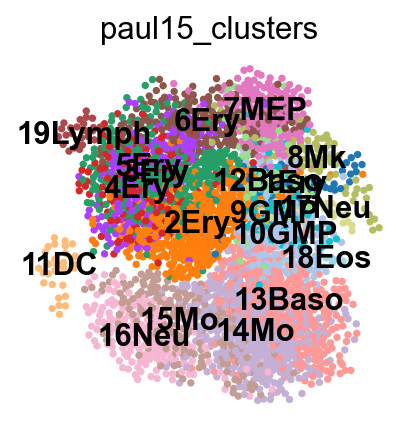

In [6]:
sc.pl.draw_graph(adata, color="paul15_clusters", legend_loc="on data")

Clustering and PAGA

In [7]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering


ModuleNotFoundError: No module named 'louvain'

In [35]:
sc.tl.paga(adata, groups="leiden")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


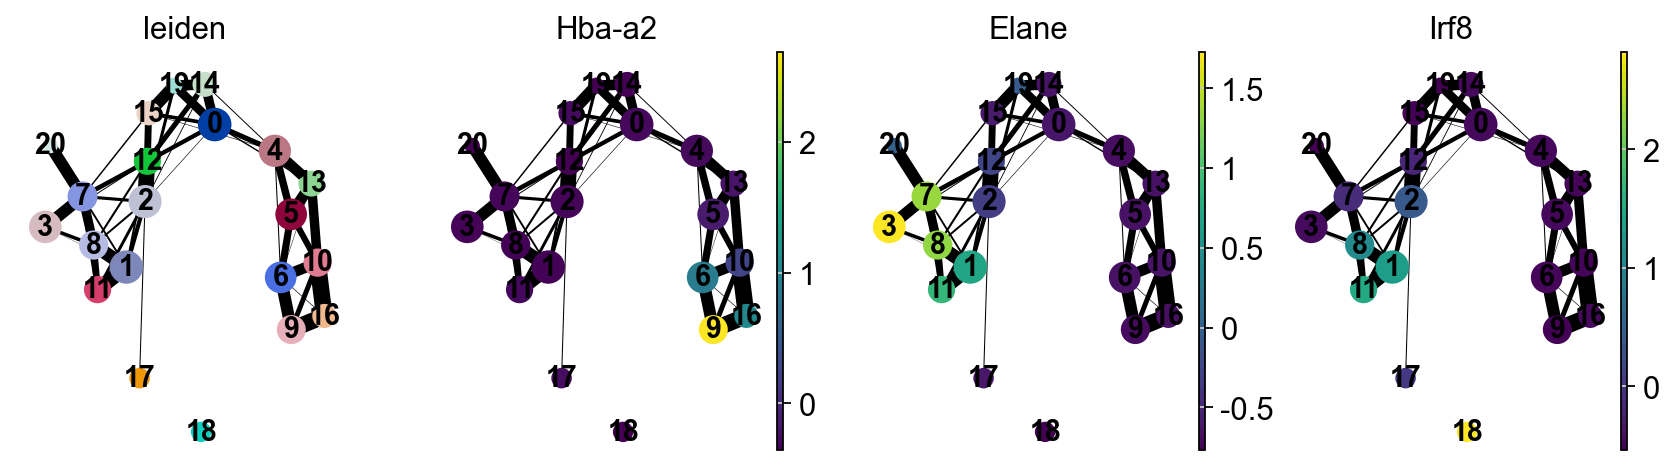

In [16]:
sc.pl.paga(adata, color=["leiden", "Hba-a2", "Elane", "Irf8"])

--> added 'pos', the PAGA positions (adata.uns['paga'])


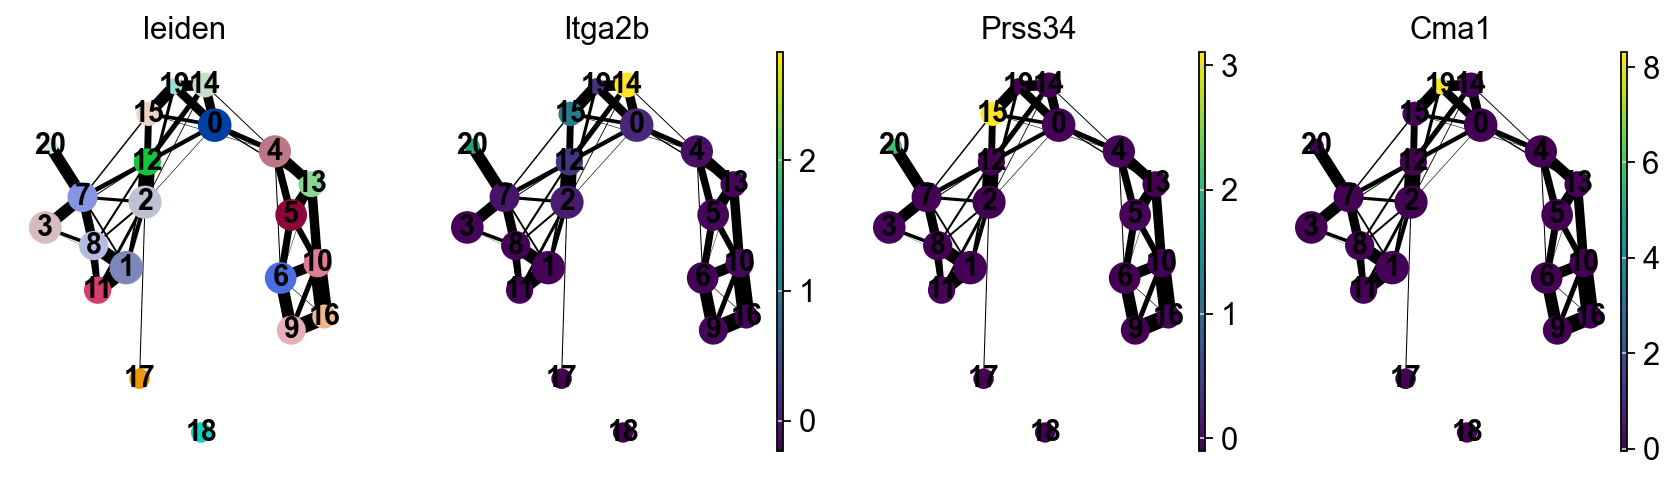

In [17]:
sc.pl.paga(adata, color=["leiden", "Itga2b", "Prss34", "Cma1"])

In [32]:
adata.obs["leiden"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')

In [38]:
adata.obs["leiden_anno"] = adata.obs["leiden"]


In [47]:
adata.obs["leiden_anno"] = adata.obs["leiden"].map(
    {
        "0": "0", "1": "1", "2": "2", "3": "3/Neu", "4":"4", "5":"5", "6":"6", "7":"7", "8":"8", "9":"9/Ery",
        "10":"10", "11":"11", "12":"12", "13":"13", "14":"14/Mk", "15":"15/Baso",
        "16":"16", "17":"17", "18":"18/Mo",
        "19":"19/Stem", "20":"20",
    }
)

In [51]:
sc.tl.paga(adata, groups="leiden_anno")


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes: >

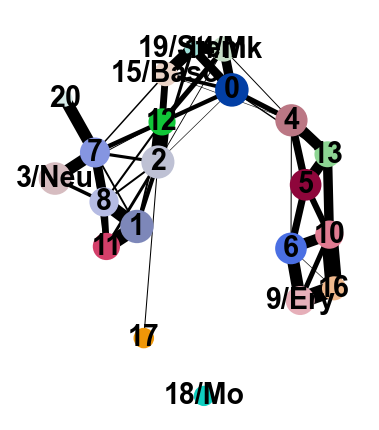

In [52]:
sc.pl.paga(adata, threshold=0.03, show=False)

Recomputing embedding using PAGA-initialization

In [53]:
sc.tl.draw_graph(adata, init_pos="paga")

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:03)


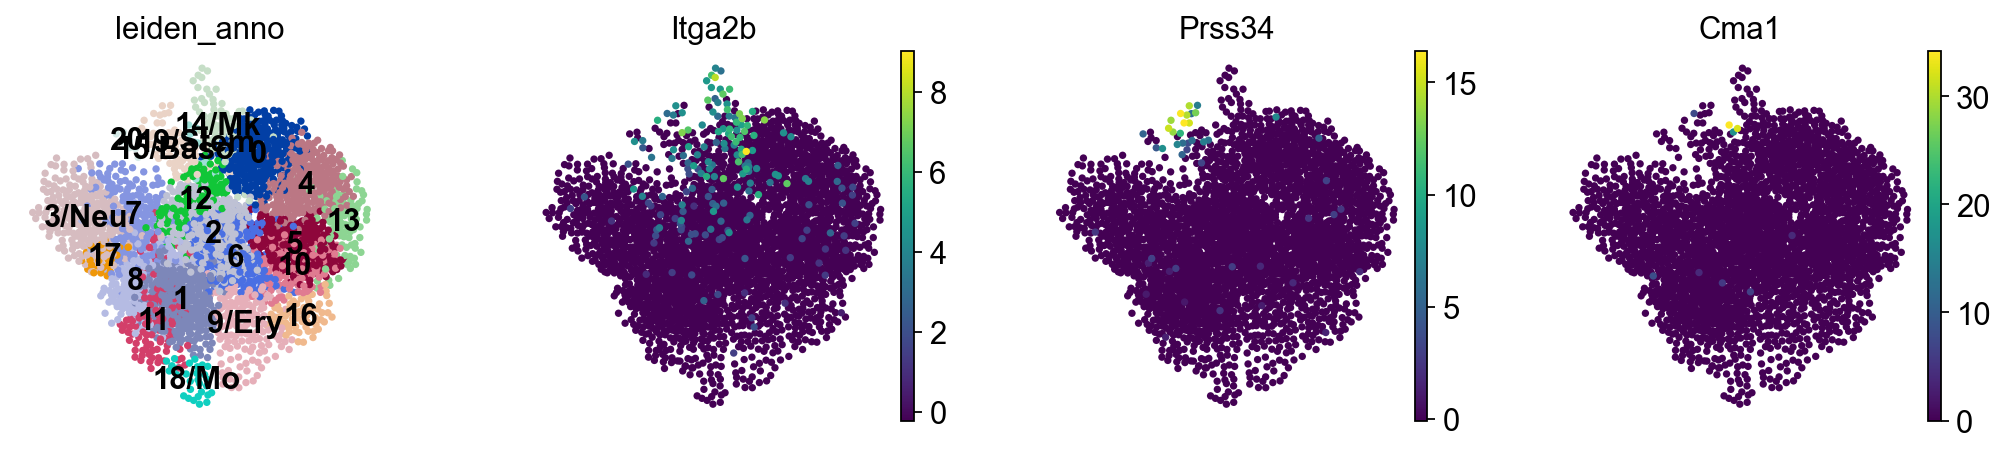

In [55]:
sc.pl.draw_graph(
    adata, color=["leiden_anno", "Itga2b", "Prss34", "Cma1"], legend_loc="on data"
)

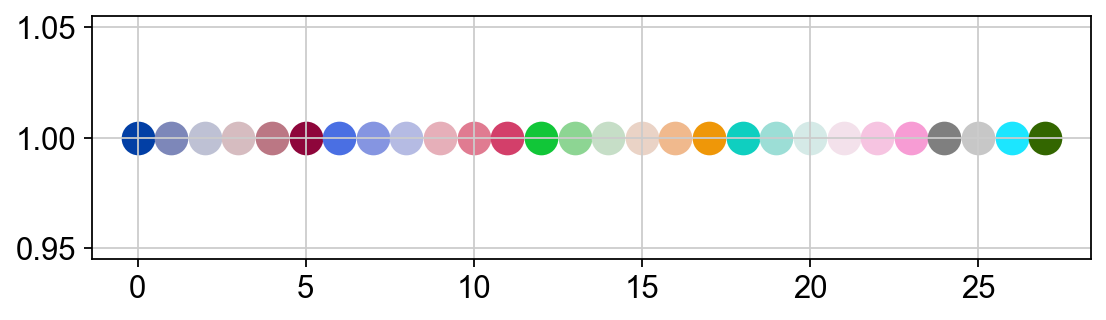

In [56]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [57]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns["leiden_anno_colors"])

In [59]:
new_colors[[16]] = zeileis_colors[[12]]  # Stem colors / green
new_colors[[10, 17, 5, 3, 15, 6, 18, 13, 7, 12]] = zeileis_colors[  # Ery colors / red
    [5, 5, 5, 5, 11, 11, 10, 9, 21, 21]
]
new_colors[[14, 8]] = zeileis_colors[[17, 16]]  # Mk early Ery colors / yellow
new_colors[[4, 0]] = zeileis_colors[[2, 8]]  # lymph progenitors / grey
new_colors[[15]] = zeileis_colors[[18]]  # Baso / turquoise
new_colors[[3, 14, 2]] = zeileis_colors[[6, 6, 6]]  # Neu / light blue
new_colors[[18, 9, 1, 11]] = zeileis_colors[[0, 0, 0, 0]]  # Mo / dark blue

In [60]:
adata.uns["leiden_anno_colors"] = new_colors

--> added 'pos', the PAGA positions (adata.uns['paga'])


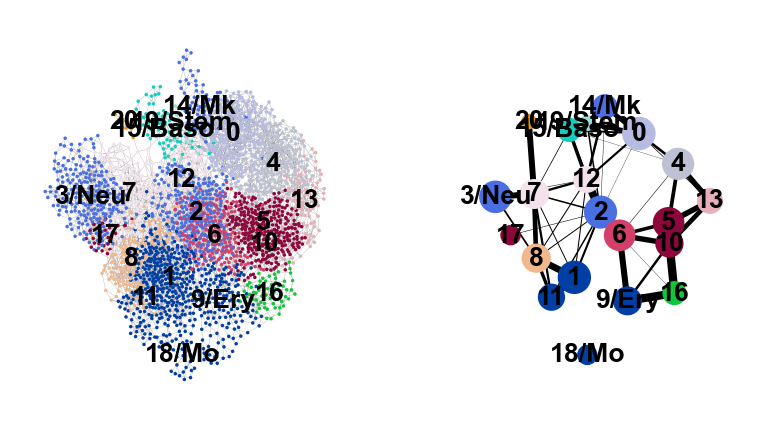

[<Axes: xlabel='FR1', ylabel='FR2'>, <Axes: >]

In [61]:
sc.pl.paga_compare(
    adata,
    threshold=0.03,
    title="",
    right_margin=0.2,
    size=10,
    edge_width_scale=0.5,
    legend_fontsize=12,
    fontsize=12,
    frameon=False,
    edges=True,
    save=True,
)

Reconstructing gene changes along PAGA paths 

In [63]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden_anno"] == "19/Stem")[0]

In [64]:
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9989278  0.99671    0.99430376 0.98939794
     0.9883687  0.98731077 0.98398703 0.983007   0.9790806  0.9762548
     0.9744365  0.9729161  0.9652972 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [65]:
gene_names = [
    *["Gata2", "Gata1", "Klf1", "Epor", "Hba-a2"],  # erythroid
    *["Elane", "Cebpe", "Gfi1"],  # neutrophil
    *["Irf8", "Csf1r", "Ctsg"],  # monocyte
]

In [66]:
adata_raw = sc.datasets.paul15()
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

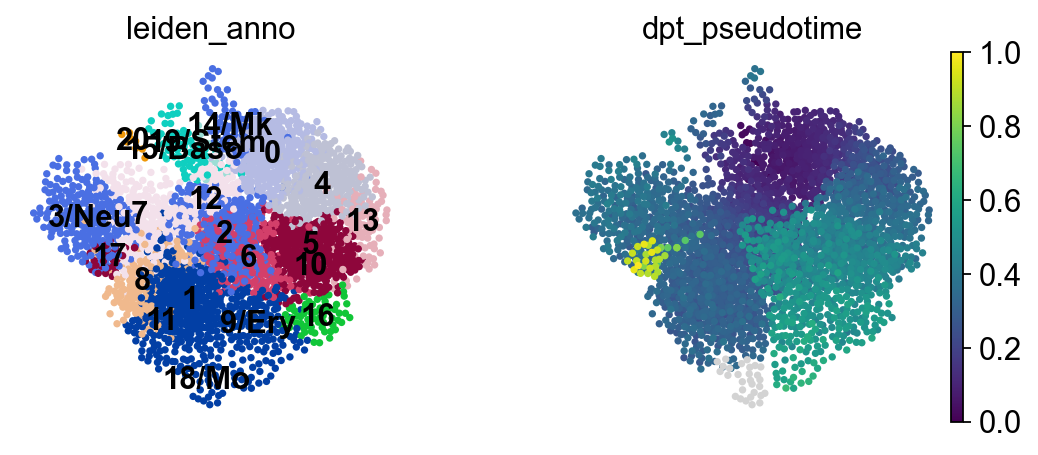

In [67]:
sc.pl.draw_graph(adata, color=["leiden_anno", "dpt_pseudotime"], legend_loc="on data")

In [68]:
paths = [
    ("erythrocytes", [16, 12, 7, 13, 18, 6, 5, 10]),
    ("neutrophils", [16, 0, 4, 2, 14, 19]),
    ("monocytes", [16, 0, 4, 11, 1, 9, 24]),
]

In [73]:
adata.obs["distance"] = adata.obs["dpt_pseudotime"]

In [76]:
adata.obs["clusters"] = adata.obs["leiden_anno"]  # just a cosmetic change

In [77]:
adata.uns["clusters_colors"] = adata.uns["leiden_anno_colors"]

In [78]:
!mkdir write

A subdirectory or file write already exists.


c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\_utils\__init__.py:470: RuntimeWarning: invalid value encountered in subtract
  ret[n:] = ret[n:] - ret[:-n]
c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\paga.py:1308: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  groups_axis.set_yticklabels(["", xlabel, ""], fontsize=ytick_fontsize)
c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\paga.py:1357: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  anno_axis.set_yticklabels(["", anno, ""], fontsize=ytick_fontsize)


ValueError: too many values to unpack (expected 2)

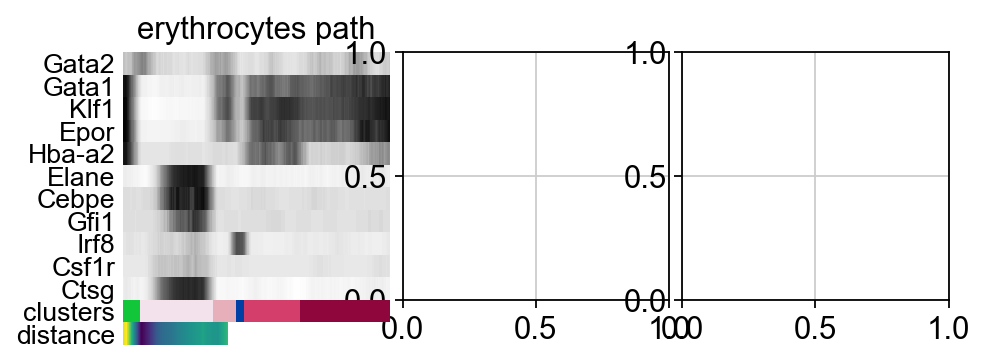

In [83]:
_, axs = pl.subplots(
    ncols=3, figsize=(6, 2.5), gridspec_kw={"wspace": 0.05, "left": 0.12}
)
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata,
        path,
        gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=["distance"],
        show_yticks=True if ipath == 0 else False,
        show_colorbar=False,
        color_map="Greys",
        groups_key="clusters",
        color_maps_annotations={"distance": "viridis"},
        title="{} path".format(descr),
        return_data=True,
        show=False,
    )
    data.to_csv("./write/paga_path_{}.csv".format(descr))
pl.savefig("./figures/paga_path_paul15.pdf")
pl.show()